# Importation

In [15]:
#!/usr/bin/env python

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import sys,os
from importlib import reload
sys.path.append('..')




#pour la suite, à vous de jouer, bon courage :)

Pour le putain de TP on va utiliser un dataset mega classique. Qui est mniste. composer de 10 classe qui sont repectivement de 0 a 9 (les chiffre ta vue)
On vq distinguer les separer en deux partie. les jeux de test et les jeux de t'apprentiddage. 

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Il faut normaliser les valeur d'image rentrer. En effet rare sont les reseau de neuronne qui prends en entree des valeur non normaliser et des image avec des taille variable. 
Il coutumier de garder une valeur en puissance de 2 et carrer. On va faire la meme chose.

In [17]:
x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


le but du tp est de realiser un reseau de neuronne de convolution e destination. Il existe de nombreux model disponible de classifieur. Tel que mobilnet, alexnet ect...

In [18]:
print('Avant la normalisation  : Min {} Max {}'.format(x_train.min(),x_train.max()))

Avant la normalisation  : Min 0 Max 255


In [19]:
xmax = x_train.max()
x_train = x_train / xmax
x_test = x_test / xmax

In [20]:
print('Avant la normalisation  : Min {} Max {}'.format(x_train.min(),x_train.max()))

Avant la normalisation  : Min 0.0 Max 1.0


Dans l'amelioration des CNN il est devellopper lords des concours de reseau de neuronnes nottamenet avec le dataset Iamage Net

In [21]:
model = keras.models.Sequential()

model.add(keras.layers.Input((28,28,1)))

model.add(keras.layers.Conv2D(8,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(16,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


    

In [22]:
model.summary()

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [23]:
batch_size = 512
epochs = 16
fit_verbosity = 1

history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = fit_verbosity,
                    validation_data = (x_test, y_test)
)

Epoch 1/16
118/118 [==============================] - 7s 56ms/step - loss: 0.7444 - accuracy: 0.7971 - val_loss: 0.2311 - val_accuracy: 0.9321
Epoch 2/16
118/118 [==============================] - 6s 55ms/step - loss: 0.1882 - accuracy: 0.9440 - val_loss: 0.1253 - val_accuracy: 0.9621
Epoch 3/16
118/118 [==============================] - 6s 55ms/step - loss: 0.1166 - accuracy: 0.9653 - val_loss: 0.0894 - val_accuracy: 0.9718
Epoch 4/16
118/118 [==============================] - 7s 56ms/step - loss: 0.0913 - accuracy: 0.9721 - val_loss: 0.0684 - val_accuracy: 0.9792
Epoch 5/16
118/118 [==============================] - 7s 55ms/step - loss: 0.0762 - accuracy: 0.9766 - val_loss: 0.0574 - val_accuracy: 0.9825
Epoch 6/16
118/118 [==============================] - 6s 55ms/step - loss: 0.0657 - accuracy: 0.9802 - val_loss: 0.0521 - val_accuracy: 0.9837
Epoch 7/16
118/118 [==============================] - 6s 55ms/step - loss: 0.0588 - accuracy: 0.9823 - val_loss: 0.0513 - val_accuracy: 0.9842

In [24]:
score = model.evaluate(x_test, y_test,verbose=0)

print(f'Test loss : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss : 0.0360
Test accuracy : 0.9877


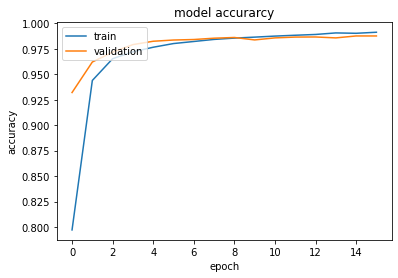

In [25]:
model.metrics_names
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accurarcy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()



c:\Users\lamou\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


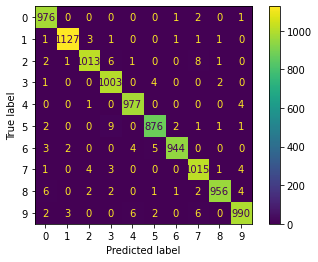

In [26]:
class estimator:
  _estimator_type  = ''
  classes = []
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes = classes
  def predict(self, X):
    y_prob = self.model.predict(X)
    y_pred = y_prob.argmax(axis = 1)
    return y_pred

classes_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
classifier = estimator(model, classes_names)
plot_confusion_matrix(estimator = classifier, X = x_test, y_true = y_test)

In [27]:
model.save('simplConv.h5')

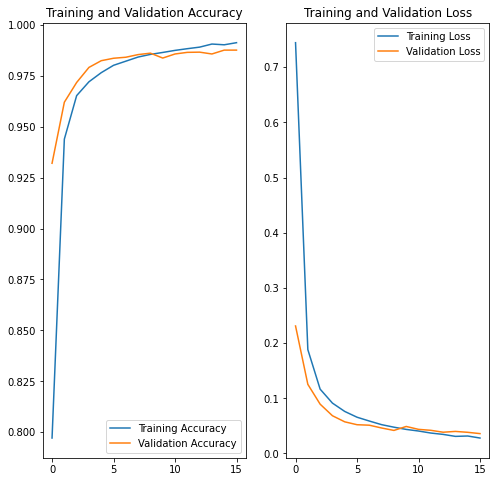

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()